In [138]:
import pandas as pd
import numpy as np
import re
import unicodedata

In [31]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [153]:
df = pd.read_csv("sentisum-assessment-dataset.csv")

In [154]:
df.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",Unnamed: 1
0,"Easy Tyre Selection Process, Competitive Prici...",NaN
1,Very easy to use and good value for money.,NaN
2,Really easy and convenient to arrange,NaN
3,It was so easy to select tyre sizes and arrang...,NaN
4,service was excellent. Only slight downside wa...,NaN


In [155]:
df = df.drop(['Unnamed: 1'],axis=1)
df.columns = ["document"]

In [156]:
df.head()

,document
0,"Easy Tyre Selection Process, Competitive Prici..."
1,Very easy to use and good value for money.
2,Really easy and convenient to arrange
3,It was so easy to select tyre sizes and arrang...
4,service was excellent. Only slight downside wa...


In [157]:
df['count']=df['document'].apply(lambda x: len(str(x).split()))

In [158]:
df.head()

,document,count
0,"Easy Tyre Selection Process, Competitive Prici...",10
1,Very easy to use and good value for money.,9
2,Really easy and convenient to arrange,6
3,It was so easy to select tyre sizes and arrang...,16
4,service was excellent. Only slight downside wa...,23


In [159]:
df['char count']=df['document'].apply(lambda x: len(x))

In [160]:
df.head()

,document,count,char count
0,"Easy Tyre Selection Process, Competitive Prici...",10,78
1,Very easy to use and good value for money.,9,42
2,Really easy and convenient to arrange,6,37
3,It was so easy to select tyre sizes and arrang...,16,90
4,service was excellent. Only slight downside wa...,23,134


In [161]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [162]:
df['avg word_len'] = df['document'].apply(lambda x:get_avg_word_len(x))

In [163]:
df.head()

,document,count,char count,avg word_len
0,"Easy Tyre Selection Process, Competitive Prici...",10,78,6.900000
1,Very easy to use and good value for money.,9,42,3.777778
2,Really easy and convenient to arrange,6,37,5.333333
3,It was so easy to select tyre sizes and arrang...,16,90,4.687500
4,service was excellent. Only slight downside wa...,23,134,4.869565


In [164]:
df['stop_words_len'] = df['document'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [165]:
df.head()

,document,count,char count,avg word_len,stop_words_len
0,"Easy Tyre Selection Process, Competitive Prici...",10,78,6.900000,1
1,Very easy to use and good value for money.,9,42,3.777778,3
2,Really easy and convenient to arrange,6,37,5.333333,2
3,It was so easy to select tyre sizes and arrang...,16,90,4.687500,5
4,service was excellent. Only slight downside wa...,23,134,4.869565,9


In [166]:
df['numeric_count'] = df['document'].apply(lambda x:len([t for t in x.split()if t.isdigit()] ))

In [167]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count
0,"Easy Tyre Selection Process, Competitive Prici...",10,78,6.900000,1,0
1,Very easy to use and good value for money.,9,42,3.777778,3,0
2,Really easy and convenient to arrange,6,37,5.333333,2,0
3,It was so easy to select tyre sizes and arrang...,16,90,4.687500,5,0
4,service was excellent. Only slight downside wa...,23,134,4.869565,9,0


In [168]:
df['upper_counts'] = df['document'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [169]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,"Easy Tyre Selection Process, Competitive Prici...",10,78,6.900000,1,0,0
1,Very easy to use and good value for money.,9,42,3.777778,3,0,0
2,Really easy and convenient to arrange,6,37,5.333333,2,0,0
3,It was so easy to select tyre sizes and arrang...,16,90,4.687500,5,0,0
4,service was excellent. Only slight downside wa...,23,134,4.869565,9,0,1


In [170]:
df.loc[4]['document']

"service was excellent. Only slight downside was not knowing exact time at garage although the garage were so quick so I wasn't delayed"

## Preprocessing

In [171]:
df['document'] = df['document'].apply(lambda x: x.lower())

In [172]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,"easy tyre selection process, competitive prici...",10,78,6.900000,1,0,0
1,very easy to use and good value for money.,9,42,3.777778,3,0,0
2,really easy and convenient to arrange,6,37,5.333333,2,0,0
3,it was so easy to select tyre sizes and arrang...,16,90,4.687500,5,0,0
4,service was excellent. only slight downside wa...,23,134,4.869565,9,0,1


In [173]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"tbh":"to be honest" }

In [174]:
def expand(x):
    if type(x)== str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [175]:
df['document'] = df['document'].apply(expand)

In [176]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,"easy tyre selection process, competitive prici...",10,78,6.900000,1,0,0
1,very easy to use and good value for money.,9,42,3.777778,3,0,0
2,really easy and convenient to arrange,6,37,5.333333,2,0,0
3,it was so easy to select tyre sizes and arrang...,16,90,4.687500,5,0,0
4,service was excellent. only slight downside wa...,23,134,4.869565,9,0,1


In [177]:
df['document'] = df['document'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [178]:
df['document'] = df['document'].apply(lambda x: " ".join(x.split()))

In [179]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [180]:
df['document'] = df['document'].apply(lambda x: remove_accented_chars(x))

In [181]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,easy tyre selection process competitive pricin...,10,78,6.900000,1,0,0
1,very easy to use and good value for money,9,42,3.777778,3,0,0
2,really easy and convenient to arrange,6,37,5.333333,2,0,0
3,it was so easy to select tyre sizes and arrang...,16,90,4.687500,5,0,0
4,service was excellent only slight downside was...,23,134,4.869565,9,0,1


In [182]:
df['document'] = df['document'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [183]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,easy tyre selection process competitive pricin...,10,78,6.900000,1,0,0
1,easy use good value money,9,42,3.777778,3,0,0
2,easy convenient arrange,6,37,5.333333,2,0,0
3,easy select tyre sizes arrange local fitting p...,16,90,4.687500,5,0,0
4,service excellent slight downside knowing exac...,23,134,4.869565,9,0,1


In [184]:
nlp = spacy.load('en_core_web_sm')

In [185]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return (" ".join(x_list))

In [186]:
df['document'] = df['document'].apply(lambda x: make_to_base(x))

In [187]:
df.head()

,document,count,char count,avg word_len,stop_words_len,numeric_count,upper_counts
0,easy tyre selection process competitive pricin...,10,78,6.900000,1,0,0
1,easy use good value money,9,42,3.777778,3,0,0
2,easy convenient arrange,6,37,5.333333,2,0,0
3,easy select tyre size arrange local fitting pr...,16,90,4.687500,5,0,0
4,service excellent slight downside know exact t...,23,134,4.869565,9,0,1


In [197]:
from wordcloud import WordCloud

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
len(df['document'])

10131

In [203]:
x = ' '.join(df['document'])

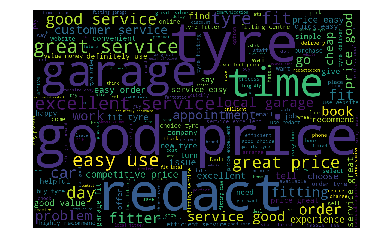

In [206]:
wc = WordCloud(width=1200,height=800).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [207]:
from textblob import TextBlob

In [210]:
#df['document'] = df['document'].apply(lambda x: TextBlob(x).correct())